# Part II - (2_2019_Fordge_bike_dataset)
## by (Kafayat Ibrahim)



## Investigation Overview



> In this analysis i would like to investigate on what time of the day, days of the week the trip take place,and the station with more activities. also to find out on how attribute such as (age,sex,usertype and trip duration) contributed to the activities of the location and time group



## Dataset Overview

>The 201902-fordgobike-tripdata is all about the information for  february 2019 fordgo bike trip
the data provided contain 16 columns with about 183412.two date time columns,which include start date and end date column. the data set has two location which are start_station, and end_station, user attributes. start and end latitude, longitute.
Although i use the subset data of the top 7 start s station name data for my analysis

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgo_top_7=pd.read_csv('top7_bike_data.csv')
print(fordgo_top_7.head())
print(fordgo_top_7.info())

   duration_sec               start_time                 end_time  \
0         52185  2019-02-28 17:32:10.145  2019-03-01 08:01:55.975   
1          1066  2019-02-28 23:31:16.139  2019-02-28 23:49:02.792   
2          1554  2019-02-28 23:20:24.089  2019-02-28 23:46:19.019   
3           401  2019-02-28 23:30:52.471  2019-02-28 23:37:33.955   
4           239  2019-02-28 23:28:42.709  2019-02-28 23:32:41.769   

   start_station_id                                 start_station_name  \
0                21   montgomery st bart station (market st at 2nd st)   
1                58                               market st at 10th st   
2                15  san francisco ferry building (harry bridges pl...   
3                58                               market st at 10th st   
4                21   montgomery st bart station (market st at 2nd st)   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
print(fordgo_top_7['start_day'].value_counts())
print(fordgo_top_7['period_day'].value_counts())

thursday     4236
tuesday      3953
wednesday    3567
friday       3503
monday       3123
saturday     1113
sunday        963
Name: start_day, dtype: int64
morning      8718
afternoon    7286
night        4454
Name: period_day, dtype: int64


In [4]:
ordinal_var={'start_day':['monday','tuesday','wednesday','thursday','friday','saturday','sunday'],
         'period_day':['morning','afternoon','night'] 
      }
for var in ordinal_var:
    col_dtype=pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var[var])
    fordgo_top_7[var]=fordgo_top_7[var].astype(col_dtype)
    

## (Visualization 1)
### Investigate trip frequency with time properties
>Trip made by 8am in the morning and 5pm in evening has highest counts due to rushing hours to work and after close of work 

> Morning and afternoon has higher trip count compare to the night, generally morning and afternoon has more trips according to hour plot plot

> Weekdays trips has higher counts than weekend trips, majority of the riders used it on working days. 

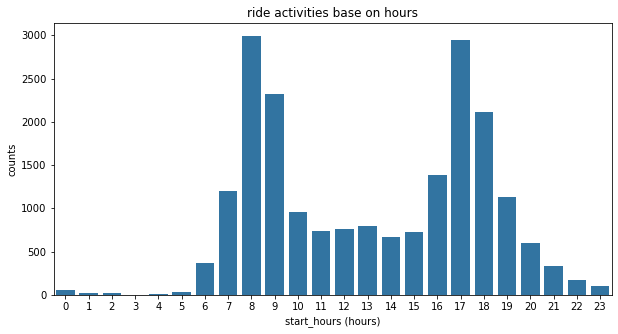

In [5]:
base_color=sb.color_palette()[0]
hour_order=np.arange(0,24)
plt.figure(figsize=[10,5]);
sb.countplot(data=fordgo_top_7, x='start_hour', color=base_color, order=hour_order);
plt.title('ride activities base on hours')
plt.xlabel('start_hours (hours)');
plt.ylabel('counts');

In [6]:
def count_plot(var1):
    color=sb.color_palette()[0]
    sb.countplot(data=fordgo_top_7, x=var1, color=color)
    plt.title(f"Top 7 most trip base on {var1}")
    plt.xlabel(f"{var1}")
    plt.ylabel(f"count of {var1}")
    plt.xticks(rotation=15)

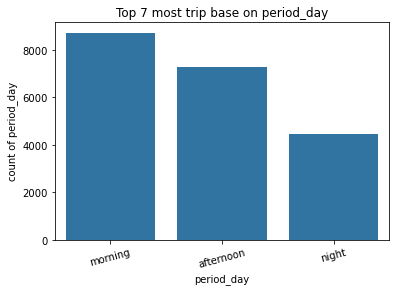

In [7]:
count_plot('period_day')

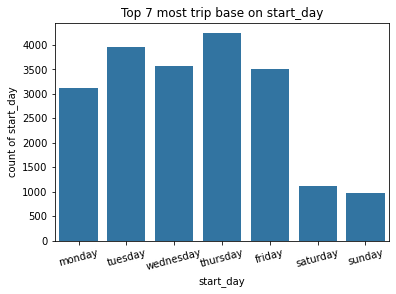

In [8]:
count_plot('start_day')

### The trip distribution of with Gender and user type
> The male counts is three times female counts

> The trips counts by subscribers is more than the trip made by customers user type

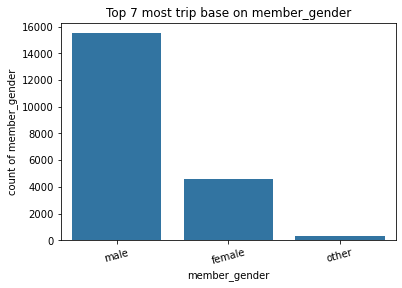

In [9]:
count_plot('member_gender')

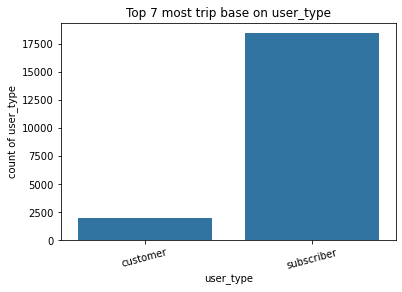

In [10]:
count_plot('user_type')

### Distribution of trips across the top 7 stations
>The top 7 stations is located in San fransisco and conneted to the public Transportation, including Bart, Caltrain and ferry

In [11]:
y=fordgo_top_7['start_station_name'].value_counts()
y_order=y.index

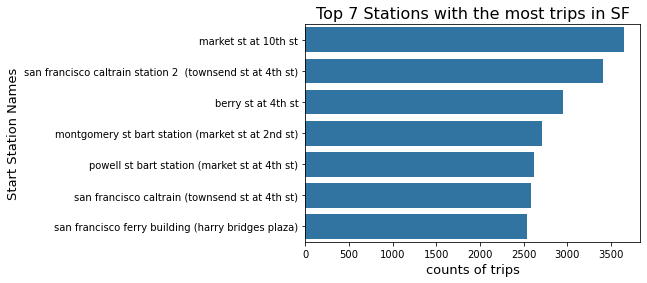

In [12]:
# top 7 stations
base_color=sb.color_palette()[0]
sb.countplot(data=fordgo_top_7, y='start_station_name', color=base_color,order=y_order);
plt.title('Top 7 Stations with the most trips in SF', fontsize=16);
plt.ylabel('Start Station Names', fontsize=13);
plt.xlabel('counts of trips', fontsize=13);

## (Visualization 2)

#### Investigate the top seven station  with time group
> Half of the stations has most trip count in the morning and the second half has most trip count in the afternoon

> Generally there are mor trips during the weekdays than week end across the top 7 stations

In [13]:
def cat_count_plot(var1,var2):
    plt.figure(figsize=(10,6))
    color=sb.color_palette()[0]
    sb.countplot(data=fordgo_top_7, y=var1,hue=var2,  order=y_order)
    plt.title(f"Trip count of top 7 stations base on Time variable({var2})", fontsize=14)
    plt.ylabel(f"{var1}")
    plt.xlabel(f"count of {var1}")
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5), title=var2);
   

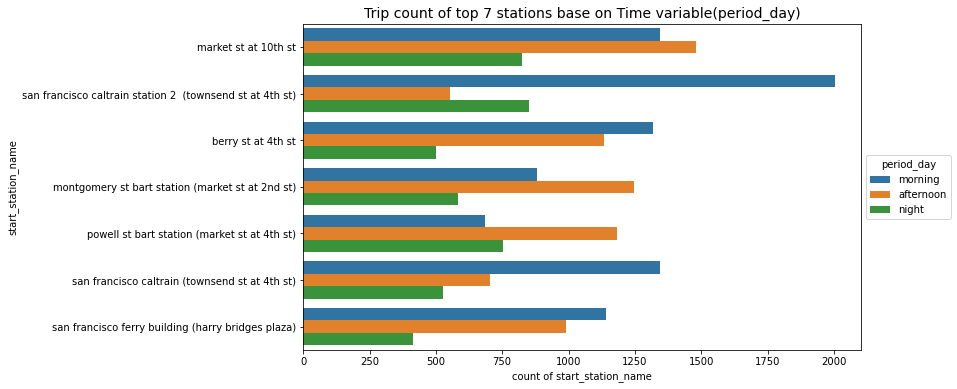

In [14]:
cat_count_plot('start_station_name','period_day')

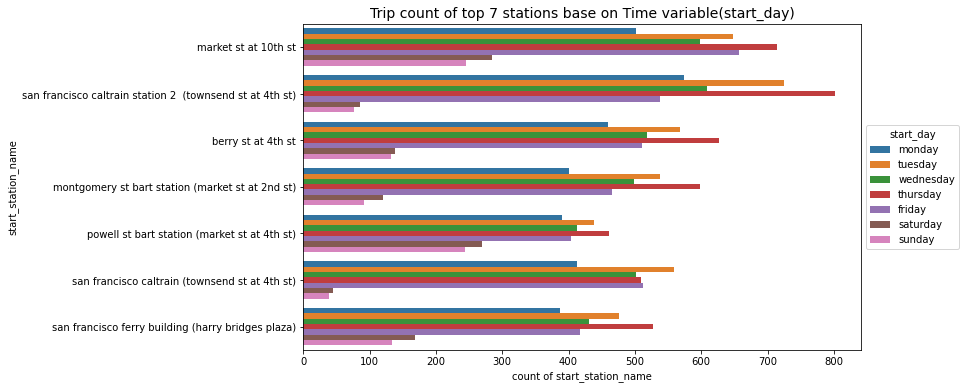

In [15]:
cat_count_plot('start_station_name','start_day')

In [16]:
customers=fordgo_top_7[fordgo_top_7['user_type']=='customer']
subscribers=fordgo_top_7[fordgo_top_7['user_type']=='subscriber']

## (Visualization 3)

#### Investigate the top seven station base on user types with time group
> The customers user type has more trips during the weekend, station like powell st bart station (market st at 4th st) and san francisco ferry building (harry bridges plaza)

>  the subscribers user type has more trips during the week days across the top 7 stations

In [17]:
def cat2_count_plot(df,var1,var2):
    plt.figure(figsize=(10,6))
    color=sb.color_palette()[0]
    sb.countplot(data=df, y=var1,hue=var2,  order=y_order)
    plt.title(f"Top 7 station occurence with day of the week in customer/subscribers user types", fontsize=14);
    plt.ylabel(f"{var1}")
    plt.xlabel(f"count of {var1}");
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5), title=var2);

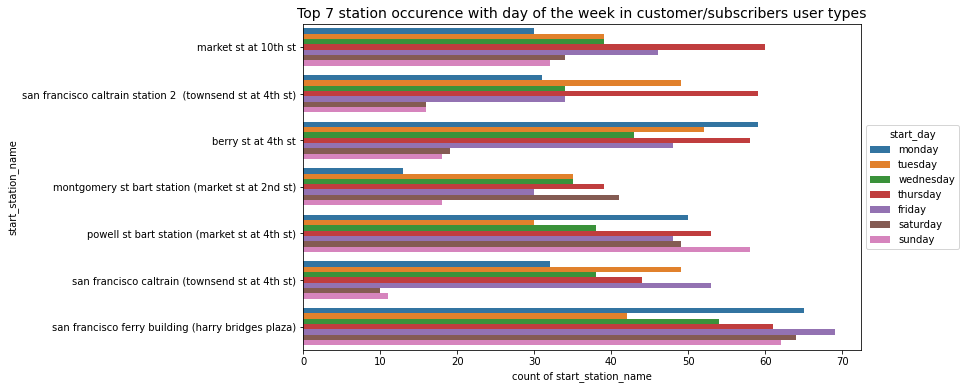

In [18]:
cat2_count_plot(customers,'start_station_name','start_day')

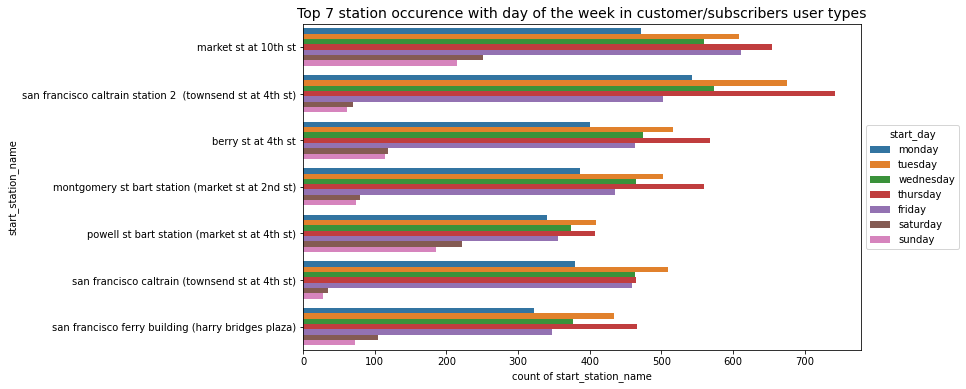

In [19]:
cat2_count_plot(subscribers,'start_station_name','start_day')

### Customers trip duration across the top 7 stations base on time group
> The Average trip duration for customers is above 1000 seconds, Trip made during the weekend has longer trip durations

> powell st bart station (market st at 4th st) and san francisco ferry building (harry bridges plaza) stations has longer trip duration in the  morning afternoon and night


In [20]:
x=fordgo_top_7['start_station_id'].value_counts()
x_order=x.index
x_order

Int64Index([58, 67, 81, 21, 3, 30, 15], dtype='int64')

In [24]:
def Facet_plot(df, var1):
    default_color = sb.color_palette()[0]
    g= sb.FacetGrid(data=df, col=var1, col_wrap=4,margin_titles=True, height=4)
    g.map(sb.boxplot,'start_station_id','duration_sec', color=default_color, order=x_order);
    g.fig.suptitle(f"Distribution of Duration with the customers base on time varibles ({var1}) in the top 7 stations",fontsize=14);
    g.fig.subplots_adjust(top=0.87)
    plt.yscale('log');
    plt.yticks([10,50,100,650,1000,2000,4000,10000], [10,70,100,650,'1K','2K','4K','10K']);
    

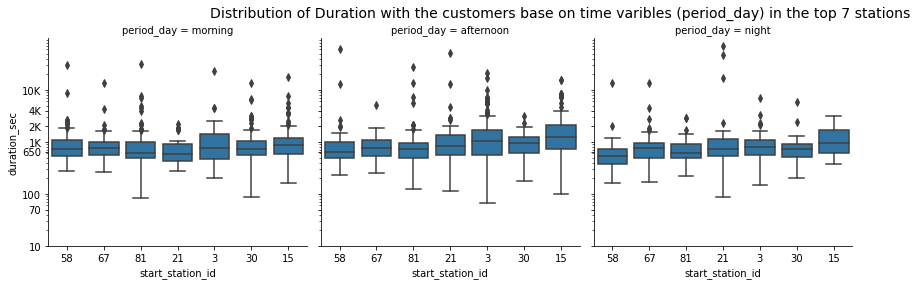

In [25]:
Facet_plot(customers, 'period_day')

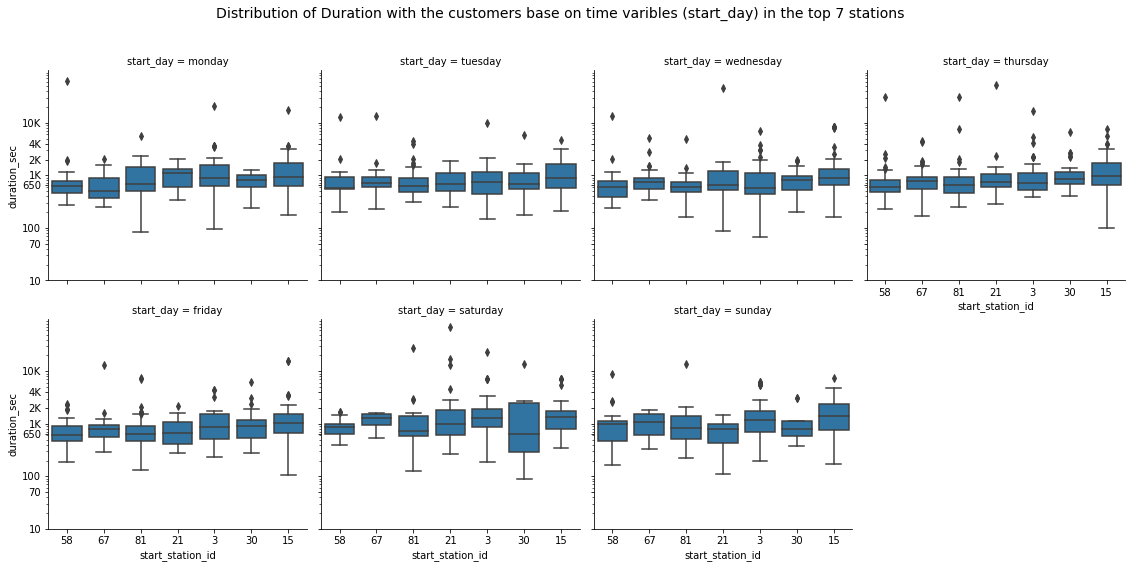

In [26]:
Facet_plot(customers, 'start_day')

### Subscribers trip duration across the top 7 stations base on time group
> Generally the average trip durations across the top 7 station with subscribers is 650 seconds.

In [27]:
def Facet_plot2(df, var1):
    default_color = sb.color_palette()[0]
    g= sb.FacetGrid(data=df, col=var1, col_wrap=4,margin_titles=True, height=4)
    g.map(sb.boxplot,'start_station_id','duration_sec', color=default_color, order=x_order);
    g.fig.suptitle(f"Distribution of Duration with the subsdribers base on time varibles ({var1}) in the top 7 stations",fontsize=14);
    g.fig.subplots_adjust(top=0.87)
    plt.yscale('log');
    plt.yticks([10,50,100,650,1000,2000,4000,10000], [10,70,100,650,'1K','2K','4K','10K']);

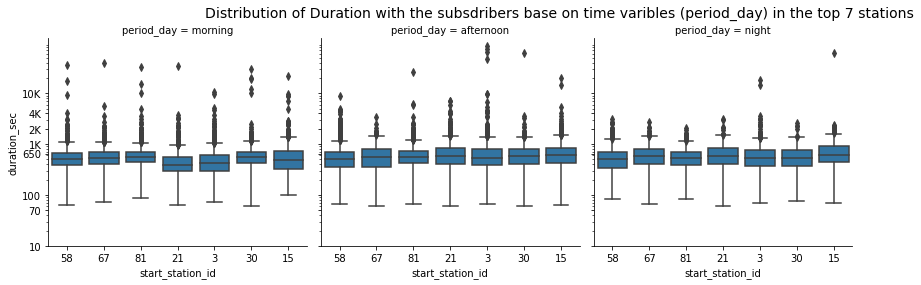

In [28]:
Facet_plot2(subscribers, 'period_day')

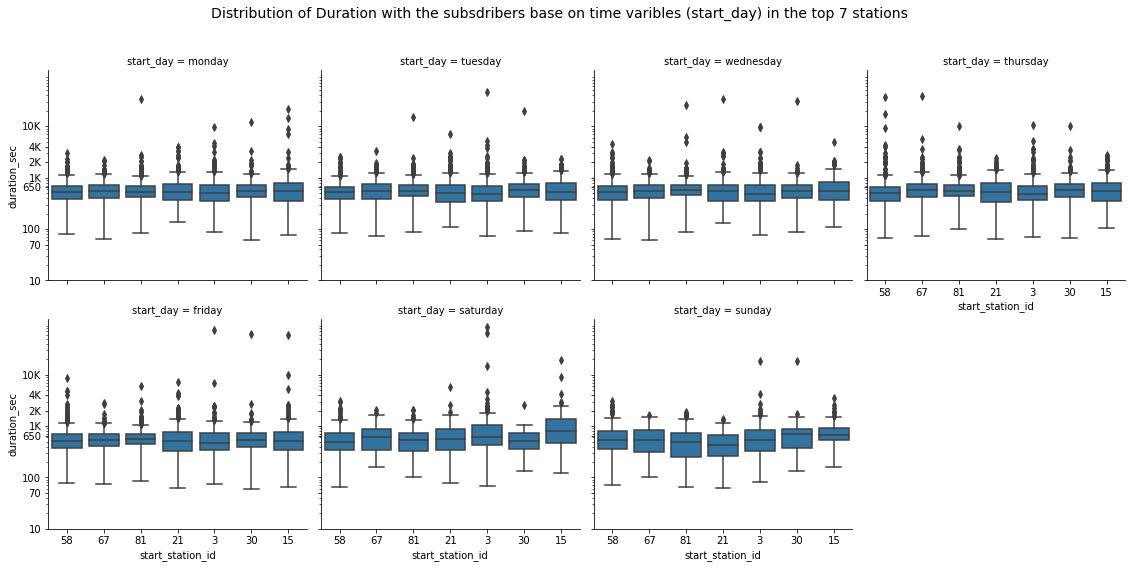

In [29]:
Facet_plot2(subscribers, 'start_day')

In [30]:
!jupyter nbconvert Part_II_slide_deck_fordgobikes_data3_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_fordgobikes_data3_template.ipynb to slides
[NbConvertApp] Writing 1023394 bytes to Part_II_slide_deck_fordgobikes_data3_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\kafayat\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\kafayat\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\kafayat\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\kafayat\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\kafayat\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_noteb